# Decision tree classification


* Scenario: Alice's Decision-Making Assistant <br>
Alice is a young professional considering whether she should purchase a high-end smartphone. To make an informed decision, she decides to use a machine learning model that predicts whether she should buy the smartphone based on her age and her annual salary.



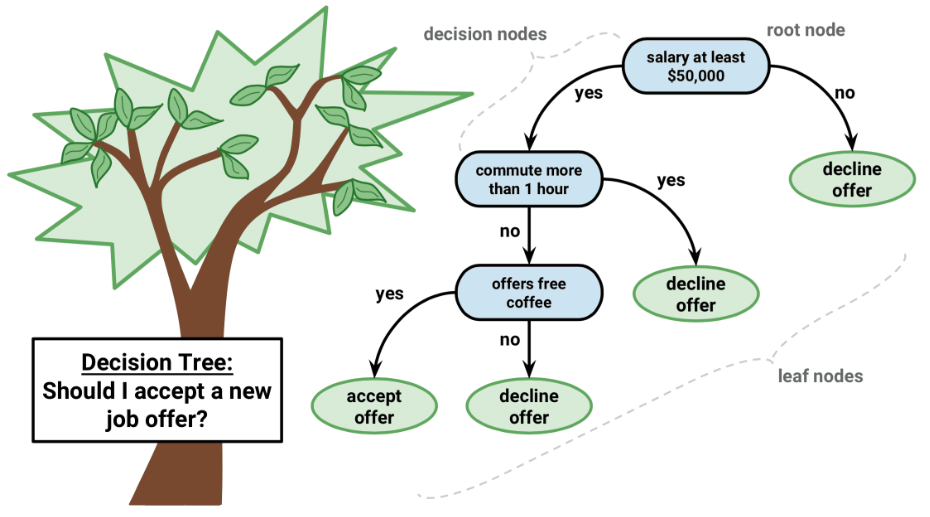

* Decision Tree algorithm is structured with decision and leaf nodes, breaking down datasets into subsets.
* Decision Trees are suitable for classifying randomly distributed data but can overfit and be sensitive to noise.
* Choosing Decision Trees for classification helps minimize entropy and maximize information gain in datasets.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Social_Network_Ads.csv')
dataset.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature scaling, a crucial preprocessing step in machine learning. It's done using a technique called standardization, implemented by the StandardScaler class from the sklearn.preprocessing module.

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #perform standardization.
X_train = sc.fit_transform(X_train) #Fitting and Transforming the Training Data
X_test = sc.transform(X_test) #Transforming the Test Data

Training a Decision Tree model to classify data. It involves importing the necessary tool, creating the model, and then training it using the prepared training data.

In [7]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Model Evaluation: Calculating Training and Testing Accuracy Scores

In [9]:
# Calculate the training score
# This method of the trained DecisionTreeClassifier object (classifier) takes the training features (X_train)
# and the true labels for the training data (y_train) as input.
# It then calculates the accuracy of the model on this training data. Accuracy is the proportion of correctly predicted instances.
train_score = classifier.score(X_train, y_train)
print(f"Training Score: {train_score:.4f}")

# Calculate the testing score
test_score = classifier.score(X_test, y_test)
print(f"Testing Score: {test_score:.4f}")

Training Score: 1.0000
Testing Score: 0.9100


Evaluating the performance of the trained Decision Tree model using a confusion matrix. It not only calculates the confusion matrix but also visualizes it for better understanding.

/tmp/ipython-input-10-1797062797.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipython-input-10-1797062797.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


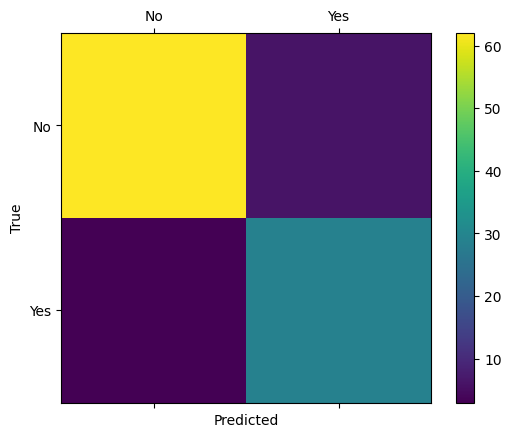

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No', 'Yes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Creating and displaying a confusion matrix, which is a table used to evaluate the performance of a classification model, in this case, the Decision Tree model trained earlier in the code.

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]])

Evaluate the accuracy of the trained Decision Tree model on the test dataset

In [12]:
#test accuracy
classifier.score(X_test, y_test)

0.91

In [13]:
# Save the trained model to a file using Python's pickle module
import pickle
with open('/content/drive/My Drive/Colab Notebooks/decisiont.pkl', 'wb') as f:
    pickle.dump(classifier, f)

Creating a visualization of how well the Decision Tree Classifier performs on the training data. It essentially creates a graph that shows the decision boundaries learned by the classifier and how the training data points are classified based on these boundaries

/tmp/ipython-input-14-2499145202.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


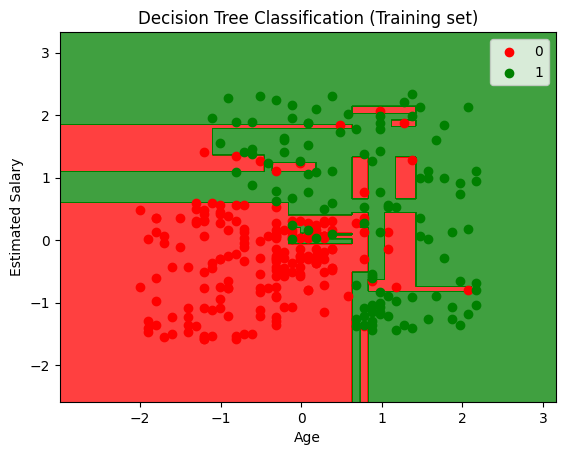

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Creating a visualization to see how well our trained Decision Tree Classifier model performs on the test data

/tmp/ipython-input-15-1848289187.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


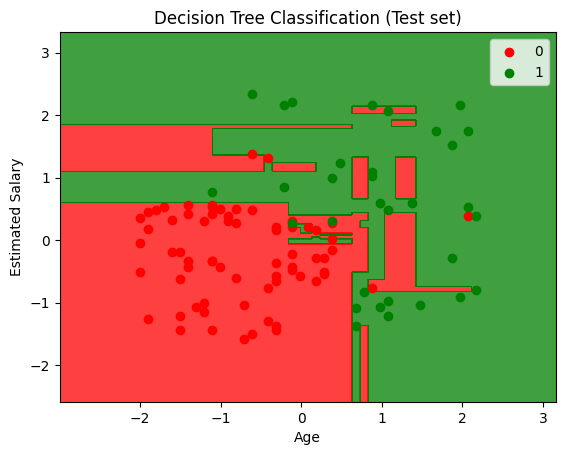

In [15]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [16]:
# Load the saved model from the file.
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/decisiont.pkl', 'rb'))

# Get user input for age and salary.
age = float(input("Enter age: "))
salary = float(input("Enter estimated salary: "))

# Prepare the data for prediction.
data = [[age, salary]]
data = sc.transform(data)

# Make a prediction using the loaded model.
y_pred = loaded_model.predict(data)

# Interpret the prediction and provide a suggestion.
if y_pred[0] == 1:
  print("Suggestion: Buy the smartphone.")
else:
  print("Suggestion: Do not buy the smartphone.")

Enter age: 34
Enter estimated salary: 200000
Suggestion: Buy the smartphone.
